## Feature Scaling
![](https://velog.velcdn.com/images/newnew_daddy/post/ab0abca9-2dcd-4e8d-b790-d971e1b5b0c2/image.png)
- 스케일링되지 않은 데이터는 특정 특성이 다른 특성보다 더 큰 영향을 미칠 수 있음
- 데이터의 각 특징이 동일한 범위에 있도록 조정하여 모델 학습을 최적화하는 데 사용
- 스케일링을 통해 알고리즘의 수렴 속도를 높이고, 특성이 서로 다른 단위로 인해 발생할 수 있는 문제점을 줄임.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 샘플 데이터 생성
np.random.seed(42)
data = np.random.rand(20, 4) * 100
df = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3', 'feature4'])


In [11]:
import pandas as pd

df = pd.read_csv("./dataset/null.csv")

df = df.fillna(df.mean())

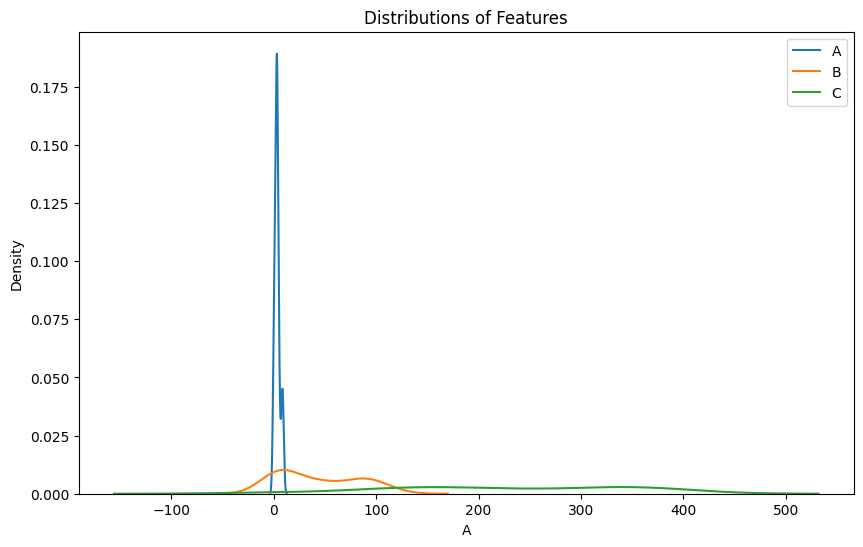

In [12]:
# 정규분포 시각화 (하나의 그래프에 선형 그래프만)
plt.figure(figsize=(10, 6))

for col in df.columns:
    sns.kdeplot(df[col], label=col)

plt.title('Distributions of Features')
plt.legend()
plt.show()

#### 1. Standard Scaler
- 평균이 0이고 분산이 1이 되도록 데이터의 각 특징을 스케일링합니다.
- 데이터가 정규분포를 따를 때 유용하며, SVM이나 로지스틱 회귀와 같은 모델에 적합합니다.
- [1, 2, 3, 4, 5] -> [-1.26, -0.63, 0, 0.63, 1.26]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_standard = scaler_standard.fit_transform(df)

df_standard = pd.DataFrame(df_standard, columns=df.columns)

#### 2. MinMax Scaler
- 데이터의 각 특징을 최소값 0, 최대값 1로 변환합니다.
- 값의 범위가 고정되어 있어, 신경망이나 k-NN 모델에서 많이 사용됩니다.
- [1, 2, 3, 4, 5] -> [0, 0.25, 0.5, 0.75, 1]

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df)

df_minmax = pd.DataFrame(df_minmax, columns=df.columns)

#### 3. Robust Scaler
- 중앙값(median)과 IQR(Interquartile Range)을 사용하여 스케일링하여 극단값(outliers)의 영향을 줄입니다.
- 데이터에 이상치가 많을 때 사용하면 효과적입니다.
- [1, 2, 3, 4, 5] -> [-1, -0.5, 0, 0.5, 1]

In [15]:
from sklearn.preprocessing import RobustScaler

scaler_robust = RobustScaler()
df_robust = scaler_robust.fit_transform(df)

df_robust = pd.DataFrame(df_robust, columns=df.columns)

#### 4. Normalizer
- 각 데이터 포인트의 크기를 1로 만들기 위해 개별 벡터를 정규화합니다.
- 주로 문서 벡터나 피처 간의 유사성을 비교할 때 사용됩니다.
- [[1, 2], [2, 3]] -> [[0.45, 0.89], [0.55, 0.83]]

In [16]:
from sklearn.preprocessing import Normalizer

scaler_normalizer = Normalizer()
df_normalizer = scaler_normalizer.fit_transform(df)

df_normalizer = pd.DataFrame(df_normalizer, columns=df.columns)

#### 5. 정규화 비교 시각화

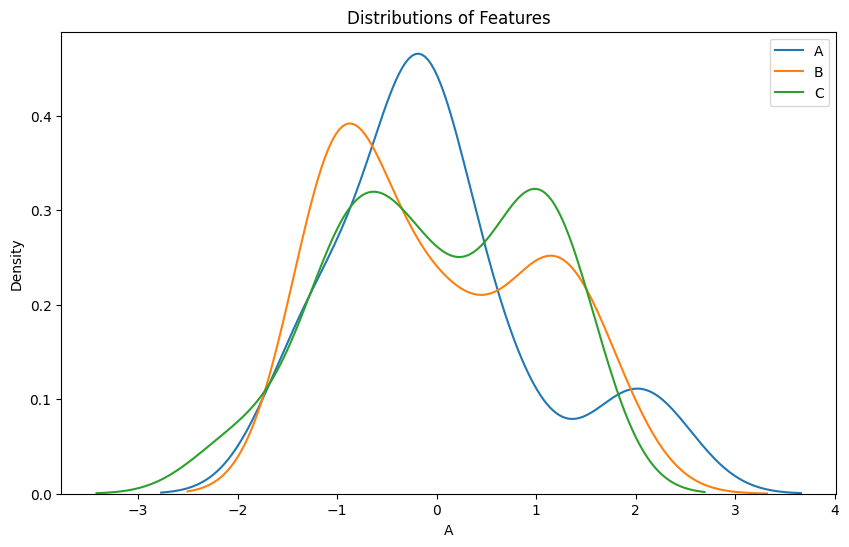

In [17]:
# 정규분포 시각화 (하나의 그래프에 선형 그래프만)
plt.figure(figsize=(10, 6))

for col in df_standard.columns:
    sns.kdeplot(df_standard[col], label=col)

plt.title('Distributions of Features')
plt.legend()
plt.show()

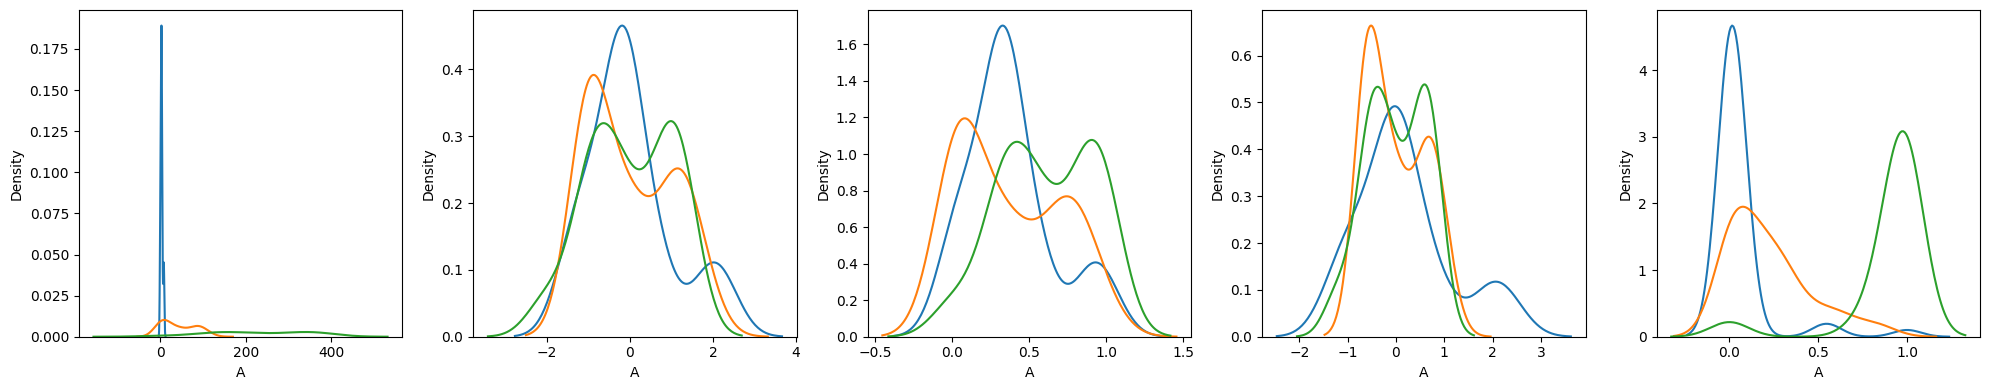

In [18]:
## plt.subplot(nrows, ncols, index)

plt.figure(figsize=(20, 4))

plt.subplot(1, 5, 1)
for col in df.columns:
    sns.kdeplot(df[col], label=col)

plt.subplot(1, 5, 2)
for col in df_standard.columns:
    sns.kdeplot(df_standard[col], label=col)

plt.subplot(1, 5, 3)
for col in df_minmax.columns:
    sns.kdeplot(df_minmax[col], label=col)

plt.subplot(1, 5, 4)
for col in df_robust.columns:
    sns.kdeplot(df_robust[col], label=col)

plt.subplot(1, 5, 5)
for col in df_normalizer.columns:
    sns.kdeplot(df_normalizer[col], label=col)

plt.tight_layout()
plt.show()
